In [1]:
## 1,3 데이터프레임 - 광주
## 2,4 데이터프레임 - 전남

import pandas as pan
import numpy as np

xls2 = pan.read_excel('../../경기전망/경기전망19-2.xlsx')
xls3 = pan.read_excel('../../경기전망/경기전망19-3.xlsx')
xls4 = pan.read_excel('../../경기전망/경기전망19-4.xlsx')
xls5 = pan.read_excel('../../경기전망/경기전망19-5.xlsx')
xls6 = pan.read_excel('../../경기전망/경기전망19-6.xlsx')
xls7 = pan.read_excel('../../경기전망/경기전망19-7.xlsx')
xls8 = pan.read_excel('../../경기전망/경기전망19-8.xlsx')
xls9 = pan.read_excel('../../경기전망/경기전망19-9.xlsx')
xls10 = pan.read_excel('../../경기전망/경기전망19-10.xlsx')
xls11 = pan.read_excel('../../경기전망/경기전망19-11.xlsx')
xls12 = pan.read_excel('../../경기전망/경기전망19-12.xlsx')

df = pan.concat([xls2, xls3, xls4, xls5, xls6, xls7, xls8, xls9, xls10, xls11, xls12])

GJ = df['X1'].isin([24]) # 지역코드(X1)가 24인 행들만 추려 GJ로
JN = df['X1'].isin([36]) # 지역코드(X1)가 36인 행들만 추려 JN으로

df1 = df[GJ] # 지역코드가 25 : 광주인 기업만 추려내기 위함
#df1_result = df1.sort_values(by = 'global_id', ascending = True, inplace = True) # 기업코드별 오름차순 정렬

df3 = df1.set_index('global_id') # 기업코드 리스트로 빼내기 위함, 기업 리스트(기준) - 없는 기업의 경우 삭제


df2 = df[JN]  # 지역코드가 36 : 전남인 기업만 추려내기 위함
#df2_result = df2.sort_values(by = 'global_id', ascending = True, inplace = True) # 기업코드별 오름차순 정렬

#df4 = df2.set_index('global_id') # 기업코드 리스트로 빼내기 위함, 기업 리스트(기준) - 없는 기업의 경우 삭제

df5 = pan.concat([df1, df2]) ###수정코드, df5에 광주 전남 데이터프레임을 concat한다.
df5.sort_values(by = 'global_id', ascending = True)
df5.set_index('global_id', inplace=True)

#df5에는 광주와 전남에서 추출한 데이터를 열로 합친다.

ref_GJ = [] # 앞으로 분석할 '광주'기업코드들의 기준 리스트 - 없거나 추가되는 기업이 나오기 때문에 연속성을 위해 리스트 만듦
ref_JN = [] # 앞으로 분석할 '전남'기업코드들의 기준 리스트 - 없거나 추가되는 기업이 나오기 때문에 연속성을 위해 리스트 만듦

ref_GJ.append(df3.index)
ref_JN.append(df5.index)

#df3.head()
#df4.tail()

# ref_GJ #128개 기업
# ref_JN # 64개 기업
# 총 192개 광주/전남 소재기업
# 광주 / 전남 따로 분류하여 CSV파일로 저장
# 1'9. 2월 ~ '20. 1월 총 12개의 데이터를 12개 묶어서 분석
# 만약 없는 행이 있을 경우에 ex) 2월에 존재하는 기업 코드 리스트를 가지고 뽑을건데

# 4월달에 해당 기업 데이터가 없을 경우에는
# 결측치 3월/5월 데이터의 평균으로 각 열을 채운다

In [2]:

df5.to_csv('FEB~DEC.csv', sep=',', na_rep='NaN') #취합된 데이터를 csv파일로 저장.
ref_season = []
ref_season.append(df5.index)
ref_season   #ref_seacon은 2월부터 12월까지 각 기업코드를 인덱스로 모아놓은 데이터프레임이다.
#현재 df5에 들어있는 데이터는 2월부터 12월까지 11개의 데이터가 들어있으므로 각 기업들이 모두 응답을 하였다면
#워드카운터를 실행했을 때 11개의 데이터가 모두 존재해야한다. 실제로 개수를 세보았을 때 모든 기업이 11개의 데이터가 있는것은 아니므로
#x16 기업유형을 기준으로, 일반기업일경우(1) 6점 이상, 벤처,이노비즈,경영혁신기업(2)일경우 12점이상을 기준으로 둔다. 
#=> 6응답 이상을 신뢰기준으로 잡는다.

[Int64Index([134160, 134161, 134163, 134164, 126648, 134165, 134166, 134167,
             134168, 134169,
             ...
             135955, 135651, 134174, 118670, 113177, 118866, 135633, 135950,
             135921, 135133],
            dtype='int64', name='global_id', length=2152)]

In [3]:
pan.pivot_table(df5,index=['global_id'])
#피벗테이블(평균값을 나타내줌.)을 생성해서 X16을 살펴보면, 1 또는 2로 딱 나눠떨어지지 않는다. 그 이유인 즉슨, 한 기업에서 1과 2가 혼용
#되는 곳이 있다는 뜻인데, ~~~

,X1,X16,X17,X17_1,X2,X20,X21,X3,X30,X31,...,X62,X63,X64,X65,X66,X67,X68,X69,X70,X71
global_id,,,,,,,,,,,,,,,,,,,,,
112986,24,1.909091,1.181818,1.0,5.000000,2.727273,3.272727,25.0,2.818182,3.272727,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.090909,0.090909,0.181818,0.000000,0.0
113011,24,2.000000,1.000000,1.0,5.000000,2.818182,2.636364,18.0,2.727273,2.454545,...,0.000000,0.000000,1.000000,0.727273,0.000000,0.181818,0.363636,0.181818,0.000000,0.0
113025,36,1.000000,2.000000,2.0,2.454545,2.818182,2.545455,13.0,2.909091,3.090909,...,0.000000,0.000000,0.636364,0.727273,0.727273,0.000000,0.272727,0.181818,0.090909,0.0
113028,24,1.000000,2.000000,2.0,1.000000,2.700000,3.100000,528.8,0.000000,0.000000,...,0.000000,0.600000,0.000000,0.000000,0.000000,0.000000,0.100000,0.000000,0.100000,0.0
113030,24,1.000000,2.000000,2.0,4.000000,1.818182,2.727273,59.0,0.000000,0.000000,...,0.000000,0.727273,0.000000,0.000000,0.000000,0.000000,0.090909,0.000000,0.272727,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136206,36,1.000000,2.000000,2.0,2.000000,2.333333,2.444444,69.0,0.000000,0.000000,...,0.111111,0.111111,0.000000,0.000000,0.000000,0.000000,0.111111,0.000000,0.000000,0.0
136207,36,1.000000,2.000000,2.0,3.000000,1.777778,2.111111,27.0,1.333333,1.666667,...,0.222222,0.666667,0.111111,0.000000,0.000000,0.111111,0.000000,0.111111,0.222222,0.0
136208,36,1.666667,1.000000,1.0,6.000000,1.000000,1.555556,22.0,1.000000,1.555556,...,0.222222,0.111111,0.000000,0.333333,0.000000,0.222222,0.111111,0.444444,0.111111,0.0


In [4]:
#df5 데이터프레임을 df5_copy 데이터프레임에 복사하여 인덱스값만 추출, 카운트를 진행한다.
df5_copy = df5.copy()
val_cnt = pan.value_counts(df5_copy.index.values,sort=True)
#월마다 각 기업코드(global_id)가 가지는 값을 출력한다. 앞서 말했던, 기업코드별로 각 4개이상인 데이터를 이용할 예정이다.

In [5]:
tmp = val_cnt>=8
tmp_cnt = val_cnt.loc[tmp]
tmp_cnt
#우리가 사용할 값들을 나열했다.

118756    11
134733    11
134611    11
134389    11
134383    11
          ..
136205     9
134166     8
113092     8
118726     8
134347     8
Length: 197, dtype: int64

In [6]:
df5

,X1,X2,X3,X16,X17,X17_1,X20,X21,X30,X31,...,X62,X63,X64,X65,X66,X67,X68,X69,X70,X71
global_id,,,,,,,,,,,,,,,,,,,,,
134160,24,1,47,1,2,2,1,1,0,0,...,0,0,0,1,0,0,0,0,0,0
134161,24,3,75,1,2,2,3,2,0,0,...,0,0,0,0,0,0,1,0,0,0
134163,24,3,41,1,2,2,3,3,0,0,...,0,0,0,0,0,0,1,0,0,0
134164,24,2,75,1,2,2,3,3,0,0,...,0,0,0,0,0,0,0,0,1,0
126648,24,2,62,2,2,2,2,2,0,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118866,36,2,11,1,1,2,3,3,3,3,...,0,0,0,0,0,0,0,0,1,0
135633,36,1,22,1,2,2,4,3,4,3,...,0,0,0,1,0,0,0,0,0,0
135950,36,5,52,2,2,1,2,3,0,0,...,0,0,1,0,0,0,0,0,0,0


In [7]:
#사용한 값들은 두고, 이제 우리가 가중치를 줄 수 있는 값들을 남기고 모든 열은 삭제할 것이다.
df5 = df5.drop(['X3','X17','X17_1','X20','X30','X31','X32','X34','X37','X39','X40','X41','X42','X43','X44','X45','X46','X47','X48','X49','X55','X56','X62','X63','X64','X65','X66','X67','X68','X69','X70','X71'],axis=1)
#df_result = pan.concat([df5,tmp_cnt],axis=1)

In [8]:
df5

,X1,X2,X16,X21,X33,X35,X36,X38,X57,X58,X59,X60,X61
global_id,,,,,,,,,,,,,
134160,24,1,1,1,1,0,1,1,0,1,0,0,1
134161,24,3,1,2,2,0,2,2,1,0,0,0,0
134163,24,3,1,3,2,0,2,3,0,0,1,0,1
134164,24,2,1,3,3,0,3,3,0,0,0,0,1
126648,24,2,2,2,2,0,1,2,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
118866,36,2,1,3,3,3,3,3,0,1,0,0,0
135633,36,1,1,3,3,0,4,4,0,1,1,0,0
135950,36,5,2,3,3,0,2,2,0,0,0,0,0


In [42]:
# 1월 그러니까 x2가 12개씩 나오거나/ 1개씩 추려야한다. 그럼.
# 12개로 나누기.
# 행자르기. 한번해보자
df2 = xls2.drop(['X3','X17','X17_1','X20','X30','X31','X32','X34','X37','X39','X40','X41','X42','X43','X44','X45','X46','X47','X48','X49','X55','X56','X62','X63','X64','X65','X66','X67','X68','X69','X70','X71'],axis=1)
df2["month"] = 2
df3 = xls3.drop(['X3','X17','X17_1','X20','X30','X31','X32','X34','X37','X39','X40','X41','X42','X43','X44','X45','X46','X47','X48','X49','X55','X56','X62','X63','X64','X65','X66','X67','X68','X69','X70','X71'],axis=1)
df3["month"] = 3
df4 = xls4.drop(['X3','X17','X17_1','X20','X30','X31','X32','X34','X37','X39','X40','X41','X42','X43','X44','X45','X46','X47','X48','X49','X55','X56','X62','X63','X64','X65','X66','X67','X68','X69','X70','X71'],axis=1)
df4["month"] = 4
df5 = xls5.drop(['X3','X17','X17_1','X20','X30','X31','X32','X34','X37','X39','X40','X41','X42','X43','X44','X45','X46','X47','X48','X49','X55','X56','X62','X63','X64','X65','X66','X67','X68','X69','X70','X71'],axis=1)
df5["month"] = 5
df6 = xls6.drop(['X3','X17','X17_1','X20','X30','X31','X32','X34','X37','X39','X40','X41','X42','X43','X44','X45','X46','X47','X48','X49','X55','X56','X62','X63','X64','X65','X66','X67','X68','X69','X70','X71'],axis=1)
df6["month"] = 6
df7 = xls7.drop(['X3','X17','X17_1','X20','X30','X31','X32','X34','X37','X39','X40','X41','X42','X43','X44','X45','X46','X47','X48','X49','X55','X56','X62','X63','X64','X65','X66','X67','X68','X69','X70','X71'],axis=1)
df7["month"] = 7
df8 = xls8.drop(['X3','X17','X17_1','X20','X30','X31','X32','X34','X37','X39','X40','X41','X42','X43','X44','X45','X46','X47','X48','X49','X55','X56','X62','X63','X64','X65','X66','X67','X68','X69','X70','X71'],axis=1)
df8["month"] = 8
df9 = xls9.drop(['X3','X17','X17_1','X20','X30','X31','X32','X34','X37','X39','X40','X41','X42','X43','X44','X45','X46','X47','X48','X49','X55','X56','X62','X63','X64','X65','X66','X67','X68','X69','X70','X71'],axis=1)
df9["month"] = 9
df10 = xls10.drop(['X3','X17','X17_1','X20','X30','X31','X32','X34','X37','X39','X40','X41','X42','X43','X44','X45','X46','X47','X48','X49','X55','X56','X62','X63','X64','X65','X66','X67','X68','X69','X70','X71'],axis=1)
df10["month"] = 10
df11 = xls11.drop(['X3','X17','X17_1','X20','X30','X31','X32','X34','X37','X39','X40','X41','X42','X43','X44','X45','X46','X47','X48','X49','X55','X56','X62','X63','X64','X65','X66','X67','X68','X69','X70','X71'],axis=1)
df11["month"] = 11
df12 = xls12.drop(['X3','X17','X17_1','X20','X30','X31','X32','X34','X37','X39','X40','X41','X42','X43','X44','X45','X46','X47','X48','X49','X55','X56','X62','X63','X64','X65','X66','X67','X68','X69','X70','X71'],axis=1)
df12["month"] = 12

In [43]:
df2=df2[df2["global_id"].isin(['113042','113045','113053','113042','113092','113137','113177','113218','116716','118624','118626','118630','118631','118649','118670','118702','118726','118741','118756','118799','118830','118831','118866','118869','118878','126604','126612','126634','126643','126648','126774','126988','127117','127126','134161','134162','134163','134164','134165','134166','134167','134168','134169','134170','134171','134172','134173','134174','134186','134188','134310','134311','134312','134313','134314','134315','134316','134318','134320','134321','134322','134323','134324','134325','134326','134327','134328','134329','134330','134331','134332','134333','134334','134335','134336','134337','134338','134339','134340','134341','134342','134343','134344','134345','134346','134347','134348','134349','134350','134351','134352','134353','134355','134356','134357','134358','134359','134360','134361','134362','134363','134364','134365','134368','134369','134372','134373','134374','134375','134376','134377','134379','134381','134382','134383','134386','134388','134389','134598','134611','134653','134733','134908','135023','135073','135098','135133','135202','135300','135313','135314','135343','135351','135376','135437','135446','135479','135490','135506','135529','135620','135621','135633','135651','135653','135669','135673','135753','135818','135831','135835','135847','135856','135869','135878','135891','135896','135913','135919','135921','135926','135928','135933','135941','135944','135949','135950','135952','135953','135955','136098','136099','136101','136102','136103','136104','136142','136150','136188','136196','136197','136204','136205','136206','136207','136208','136214','136215'])]
df2.to_csv('df2월.csv')

In [44]:
df3=df3[df3["global_id"].isin(['113042','113045','113053','113042','113092','113137','113177','113218','116716','118624','118626','118630','118631','118649','118670','118702','118726','118741','118756','118799','118830','118831','118866','118869','118878','126604','126612','126634','126643','126648','126774','126988','127117','127126','134161','134162','134163','134164','134165','134166','134167','134168','134169','134170','134171','134172','134173','134174','134186','134188','134310','134311','134312','134313','134314','134315','134316','134318','134320','134321','134322','134323','134324','134325','134326','134327','134328','134329','134330','134331','134332','134333','134334','134335','134336','134337','134338','134339','134340','134341','134342','134343','134344','134345','134346','134347','134348','134349','134350','134351','134352','134353','134355','134356','134357','134358','134359','134360','134361','134362','134363','134364','134365','134368','134369','134372','134373','134374','134375','134376','134377','134379','134381','134382','134383','134386','134388','134389','134598','134611','134653','134733','134908','135023','135073','135098','135133','135202','135300','135313','135314','135343','135351','135376','135437','135446','135479','135490','135506','135529','135620','135621','135633','135651','135653','135669','135673','135753','135818','135831','135835','135847','135856','135869','135878','135891','135896','135913','135919','135921','135926','135928','135933','135941','135944','135949','135950','135952','135953','135955','136098','136099','136101','136102','136103','136104','136142','136150','136188','136196','136197','136204','136205','136206','136207','136208','136214','136215'])]
df3.to_csv('df3월.csv')

In [45]:
df4=df4[df4["global_id"].isin(['113042','113045','113053','113042','113092','113137','113177','113218','116716','118624','118626','118630','118631','118649','118670','118702','118726','118741','118756','118799','118830','118831','118866','118869','118878','126604','126612','126634','126643','126648','126774','126988','127117','127126','134161','134162','134163','134164','134165','134166','134167','134168','134169','134170','134171','134172','134173','134174','134186','134188','134310','134311','134312','134313','134314','134315','134316','134318','134320','134321','134322','134323','134324','134325','134326','134327','134328','134329','134330','134331','134332','134333','134334','134335','134336','134337','134338','134339','134340','134341','134342','134343','134344','134345','134346','134347','134348','134349','134350','134351','134352','134353','134355','134356','134357','134358','134359','134360','134361','134362','134363','134364','134365','134368','134369','134372','134373','134374','134375','134376','134377','134379','134381','134382','134383','134386','134388','134389','134598','134611','134653','134733','134908','135023','135073','135098','135133','135202','135300','135313','135314','135343','135351','135376','135437','135446','135479','135490','135506','135529','135620','135621','135633','135651','135653','135669','135673','135753','135818','135831','135835','135847','135856','135869','135878','135891','135896','135913','135919','135921','135926','135928','135933','135941','135944','135949','135950','135952','135953','135955','136098','136099','136101','136102','136103','136104','136142','136150','136188','136196','136197','136204','136205','136206','136207','136208','136214','136215'])]
df4.to_csv('df4월.csv')

In [46]:
df5=df5[df5["global_id"].isin(['113042','113045','113053','113042','113092','113137','113177','113218','116716','118624','118626','118630','118631','118649','118670','118702','118726','118741','118756','118799','118830','118831','118866','118869','118878','126604','126612','126634','126643','126648','126774','126988','127117','127126','134161','134162','134163','134164','134165','134166','134167','134168','134169','134170','134171','134172','134173','134174','134186','134188','134310','134311','134312','134313','134314','134315','134316','134318','134320','134321','134322','134323','134324','134325','134326','134327','134328','134329','134330','134331','134332','134333','134334','134335','134336','134337','134338','134339','134340','134341','134342','134343','134344','134345','134346','134347','134348','134349','134350','134351','134352','134353','134355','134356','134357','134358','134359','134360','134361','134362','134363','134364','134365','134368','134369','134372','134373','134374','134375','134376','134377','134379','134381','134382','134383','134386','134388','134389','134598','134611','134653','134733','134908','135023','135073','135098','135133','135202','135300','135313','135314','135343','135351','135376','135437','135446','135479','135490','135506','135529','135620','135621','135633','135651','135653','135669','135673','135753','135818','135831','135835','135847','135856','135869','135878','135891','135896','135913','135919','135921','135926','135928','135933','135941','135944','135949','135950','135952','135953','135955','136098','136099','136101','136102','136103','136104','136142','136150','136188','136196','136197','136204','136205','136206','136207','136208','136214','136215'])]
df5.to_csv('df5월.csv')

In [47]:
df6=df6[df6["global_id"].isin(['113042','113045','113053','113042','113092','113137','113177','113218','116716','118624','118626','118630','118631','118649','118670','118702','118726','118741','118756','118799','118830','118831','118866','118869','118878','126604','126612','126634','126643','126648','126774','126988','127117','127126','134161','134162','134163','134164','134165','134166','134167','134168','134169','134170','134171','134172','134173','134174','134186','134188','134310','134311','134312','134313','134314','134315','134316','134318','134320','134321','134322','134323','134324','134325','134326','134327','134328','134329','134330','134331','134332','134333','134334','134335','134336','134337','134338','134339','134340','134341','134342','134343','134344','134345','134346','134347','134348','134349','134350','134351','134352','134353','134355','134356','134357','134358','134359','134360','134361','134362','134363','134364','134365','134368','134369','134372','134373','134374','134375','134376','134377','134379','134381','134382','134383','134386','134388','134389','134598','134611','134653','134733','134908','135023','135073','135098','135133','135202','135300','135313','135314','135343','135351','135376','135437','135446','135479','135490','135506','135529','135620','135621','135633','135651','135653','135669','135673','135753','135818','135831','135835','135847','135856','135869','135878','135891','135896','135913','135919','135921','135926','135928','135933','135941','135944','135949','135950','135952','135953','135955','136098','136099','136101','136102','136103','136104','136142','136150','136188','136196','136197','136204','136205','136206','136207','136208','136214','136215'])]
df6.to_csv('df6월.csv')

In [48]:
df7=df7[df7["global_id"].isin(['113042','113045','113053','113042','113092','113137','113177','113218','116716','118624','118626','118630','118631','118649','118670','118702','118726','118741','118756','118799','118830','118831','118866','118869','118878','126604','126612','126634','126643','126648','126774','126988','127117','127126','134161','134162','134163','134164','134165','134166','134167','134168','134169','134170','134171','134172','134173','134174','134186','134188','134310','134311','134312','134313','134314','134315','134316','134318','134320','134321','134322','134323','134324','134325','134326','134327','134328','134329','134330','134331','134332','134333','134334','134335','134336','134337','134338','134339','134340','134341','134342','134343','134344','134345','134346','134347','134348','134349','134350','134351','134352','134353','134355','134356','134357','134358','134359','134360','134361','134362','134363','134364','134365','134368','134369','134372','134373','134374','134375','134376','134377','134379','134381','134382','134383','134386','134388','134389','134598','134611','134653','134733','134908','135023','135073','135098','135133','135202','135300','135313','135314','135343','135351','135376','135437','135446','135479','135490','135506','135529','135620','135621','135633','135651','135653','135669','135673','135753','135818','135831','135835','135847','135856','135869','135878','135891','135896','135913','135919','135921','135926','135928','135933','135941','135944','135949','135950','135952','135953','135955','136098','136099','136101','136102','136103','136104','136142','136150','136188','136196','136197','136204','136205','136206','136207','136208','136214','136215'])]
df7.to_csv('df7월.csv')

In [49]:
df8=df8[df8["global_id"].isin(['113042','113045','113053','113042','113092','113137','113177','113218','116716','118624','118626','118630','118631','118649','118670','118702','118726','118741','118756','118799','118830','118831','118866','118869','118878','126604','126612','126634','126643','126648','126774','126988','127117','127126','134161','134162','134163','134164','134165','134166','134167','134168','134169','134170','134171','134172','134173','134174','134186','134188','134310','134311','134312','134313','134314','134315','134316','134318','134320','134321','134322','134323','134324','134325','134326','134327','134328','134329','134330','134331','134332','134333','134334','134335','134336','134337','134338','134339','134340','134341','134342','134343','134344','134345','134346','134347','134348','134349','134350','134351','134352','134353','134355','134356','134357','134358','134359','134360','134361','134362','134363','134364','134365','134368','134369','134372','134373','134374','134375','134376','134377','134379','134381','134382','134383','134386','134388','134389','134598','134611','134653','134733','134908','135023','135073','135098','135133','135202','135300','135313','135314','135343','135351','135376','135437','135446','135479','135490','135506','135529','135620','135621','135633','135651','135653','135669','135673','135753','135818','135831','135835','135847','135856','135869','135878','135891','135896','135913','135919','135921','135926','135928','135933','135941','135944','135949','135950','135952','135953','135955','136098','136099','136101','136102','136103','136104','136142','136150','136188','136196','136197','136204','136205','136206','136207','136208','136214','136215'])]
df8.to_csv('df8월.csv')

In [50]:
df9=df9[df9["global_id"].isin(['113042','113045','113053','113042','113092','113137','113177','113218','116716','118624','118626','118630','118631','118649','118670','118702','118726','118741','118756','118799','118830','118831','118866','118869','118878','126604','126612','126634','126643','126648','126774','126988','127117','127126','134161','134162','134163','134164','134165','134166','134167','134168','134169','134170','134171','134172','134173','134174','134186','134188','134310','134311','134312','134313','134314','134315','134316','134318','134320','134321','134322','134323','134324','134325','134326','134327','134328','134329','134330','134331','134332','134333','134334','134335','134336','134337','134338','134339','134340','134341','134342','134343','134344','134345','134346','134347','134348','134349','134350','134351','134352','134353','134355','134356','134357','134358','134359','134360','134361','134362','134363','134364','134365','134368','134369','134372','134373','134374','134375','134376','134377','134379','134381','134382','134383','134386','134388','134389','134598','134611','134653','134733','134908','135023','135073','135098','135133','135202','135300','135313','135314','135343','135351','135376','135437','135446','135479','135490','135506','135529','135620','135621','135633','135651','135653','135669','135673','135753','135818','135831','135835','135847','135856','135869','135878','135891','135896','135913','135919','135921','135926','135928','135933','135941','135944','135949','135950','135952','135953','135955','136098','136099','136101','136102','136103','136104','136142','136150','136188','136196','136197','136204','136205','136206','136207','136208','136214','136215'])]
df9.to_csv('df9월.csv')

In [51]:
df10=df10[df10["global_id"].isin(['113042','113045','113053','113042','113092','113137','113177','113218','116716','118624','118626','118630','118631','118649','118670','118702','118726','118741','118756','118799','118830','118831','118866','118869','118878','126604','126612','126634','126643','126648','126774','126988','127117','127126','134161','134162','134163','134164','134165','134166','134167','134168','134169','134170','134171','134172','134173','134174','134186','134188','134310','134311','134312','134313','134314','134315','134316','134318','134320','134321','134322','134323','134324','134325','134326','134327','134328','134329','134330','134331','134332','134333','134334','134335','134336','134337','134338','134339','134340','134341','134342','134343','134344','134345','134346','134347','134348','134349','134350','134351','134352','134353','134355','134356','134357','134358','134359','134360','134361','134362','134363','134364','134365','134368','134369','134372','134373','134374','134375','134376','134377','134379','134381','134382','134383','134386','134388','134389','134598','134611','134653','134733','134908','135023','135073','135098','135133','135202','135300','135313','135314','135343','135351','135376','135437','135446','135479','135490','135506','135529','135620','135621','135633','135651','135653','135669','135673','135753','135818','135831','135835','135847','135856','135869','135878','135891','135896','135913','135919','135921','135926','135928','135933','135941','135944','135949','135950','135952','135953','135955','136098','136099','136101','136102','136103','136104','136142','136150','136188','136196','136197','136204','136205','136206','136207','136208','136214','136215'])]
df10.to_csv('df10월.csv')

In [52]:
df11=df11[df11["global_id"].isin(['113042','113045','113053','113042','113092','113137','113177','113218','116716','118624','118626','118630','118631','118649','118670','118702','118726','118741','118756','118799','118830','118831','118866','118869','118878','126604','126612','126634','126643','126648','126774','126988','127117','127126','134161','134162','134163','134164','134165','134166','134167','134168','134169','134170','134171','134172','134173','134174','134186','134188','134310','134311','134312','134313','134314','134315','134316','134318','134320','134321','134322','134323','134324','134325','134326','134327','134328','134329','134330','134331','134332','134333','134334','134335','134336','134337','134338','134339','134340','134341','134342','134343','134344','134345','134346','134347','134348','134349','134350','134351','134352','134353','134355','134356','134357','134358','134359','134360','134361','134362','134363','134364','134365','134368','134369','134372','134373','134374','134375','134376','134377','134379','134381','134382','134383','134386','134388','134389','134598','134611','134653','134733','134908','135023','135073','135098','135133','135202','135300','135313','135314','135343','135351','135376','135437','135446','135479','135490','135506','135529','135620','135621','135633','135651','135653','135669','135673','135753','135818','135831','135835','135847','135856','135869','135878','135891','135896','135913','135919','135921','135926','135928','135933','135941','135944','135949','135950','135952','135953','135955','136098','136099','136101','136102','136103','136104','136142','136150','136188','136196','136197','136204','136205','136206','136207','136208','136214','136215'])]
df11.to_csv('df11월.csv')

In [53]:
df12=df12[df12["global_id"].isin(['113042','113045','113053','113042','113092','113137','113177','113218','116716','118624','118626','118630','118631','118649','118670','118702','118726','118741','118756','118799','118830','118831','118866','118869','118878','126604','126612','126634','126643','126648','126774','126988','127117','127126','134161','134162','134163','134164','134165','134166','134167','134168','134169','134170','134171','134172','134173','134174','134186','134188','134310','134311','134312','134313','134314','134315','134316','134318','134320','134321','134322','134323','134324','134325','134326','134327','134328','134329','134330','134331','134332','134333','134334','134335','134336','134337','134338','134339','134340','134341','134342','134343','134344','134345','134346','134347','134348','134349','134350','134351','134352','134353','134355','134356','134357','134358','134359','134360','134361','134362','134363','134364','134365','134368','134369','134372','134373','134374','134375','134376','134377','134379','134381','134382','134383','134386','134388','134389','134598','134611','134653','134733','134908','135023','135073','135098','135133','135202','135300','135313','135314','135343','135351','135376','135437','135446','135479','135490','135506','135529','135620','135621','135633','135651','135653','135669','135673','135753','135818','135831','135835','135847','135856','135869','135878','135891','135896','135913','135919','135921','135926','135928','135933','135941','135944','135949','135950','135952','135953','135955','136098','136099','136101','136102','136103','136104','136142','136150','136188','136196','136197','136204','136205','136206','136207','136208','136214','136215'])]
df12.to_csv('df12월임.csv')

In [21]:
result = pan.merge(df2, df3, on='global_id', how= 'outer')

In [22]:
result1 = pan.merge(result, df4, on='global_id', how= 'outer')

In [23]:
result2 = pan.merge(result1, df5, on='global_id', how= 'outer')

In [24]:
result3 = pan.merge(result2, df6, on='global_id', how= 'outer')

In [25]:
result4 = pan.merge(result3, df7, on='global_id', how= 'outer')

In [26]:
result5 = pan.merge(result4, df8, on='global_id', how= 'outer')

In [27]:
result6 = pan.merge(result5, df9, on='global_id', how= 'outer')

In [28]:
result7 = pan.merge(result6, df10, on='global_id', how= 'outer')

In [29]:
result8 = pan.merge(result7, df11, on='global_id', how= 'outer')

In [30]:
result9 = pan.merge(result8, df12, on='global_id', how= 'outer')

In [31]:
result9.isnull().sum()

global_id     0
X1_x         19
X2_x         19
X16_x        19
X21_x        19
             ..
X58           5
X59           5
X60           5
X61           5
month         5
Length: 155, dtype: int64

In [35]:
!pip install missingno

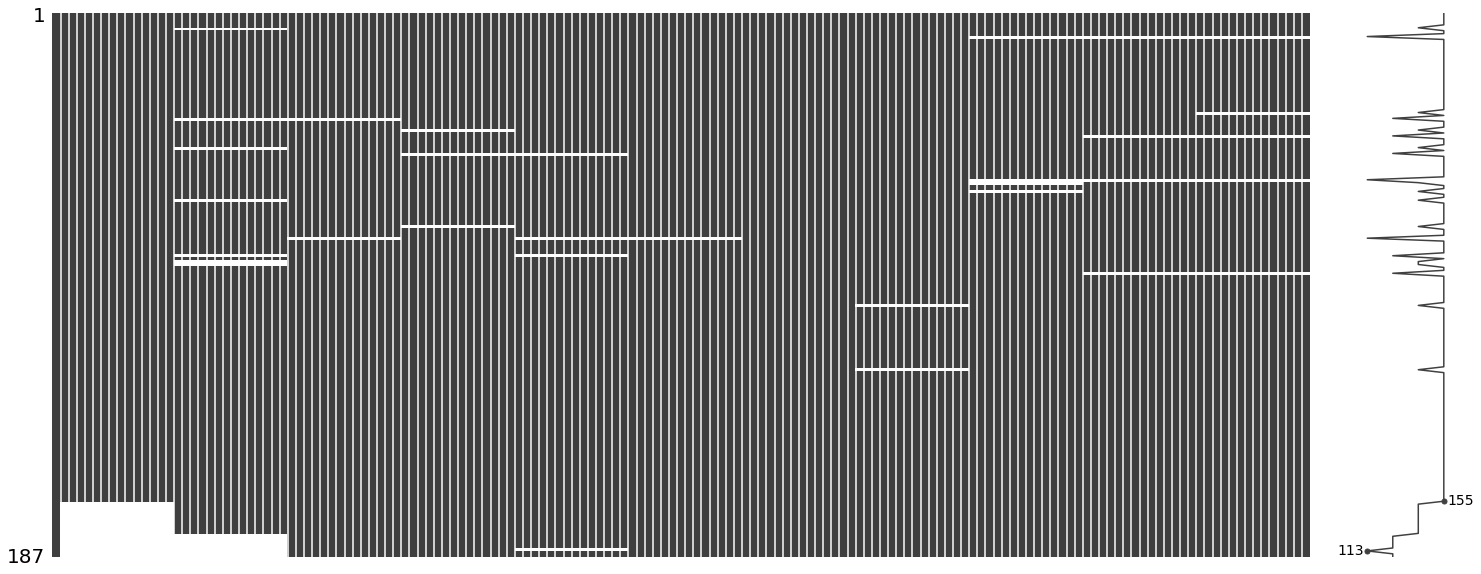

In [37]:
import missingno as msno
import matplotlib as mpl
import matplotlib.pylab as plt

msno.matrix(result9)
plt.show()

In [32]:
result9

,global_id,X1_x,X2_x,X16_x,X21_x,X33_x,X35_x,X36_x,X38_x,X57_x,...,X33,X35,X36,X38,X57,X58,X59,X60,X61,month
0,127117,36.0,3.0,2.0,2.0,2.0,0.0,3.0,2.0,0.0,...,2.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,12.0
1,134161,24.0,3.0,1.0,2.0,2.0,0.0,2.0,2.0,1.0,...,3.0,0.0,2.0,2.0,1.0,1.0,0.0,0.0,0.0,12.0
2,126988,36.0,4.0,1.0,3.0,2.0,0.0,2.0,2.0,0.0,...,2.0,0.0,2.0,1.0,1.0,1.0,1.0,0.0,0.0,12.0
3,134162,36.0,3.0,1.0,3.0,3.0,0.0,3.0,3.0,0.0,...,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,12.0
4,134163,24.0,3.0,1.0,3.0,2.0,0.0,2.0,3.0,0.0,...,3.0,0.0,3.0,3.0,1.0,0.0,1.0,0.0,0.0,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182,136207,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,12.0
183,136208,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,12.0
184,113092,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.0,0.0,2.0,2.0,1.0,1.0,0.0,0.0,0.0,12.0
185,136214,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.0,4.0,3.0,3.0,1.0,0.0,0.0,0.0,0.0,12.0


In [33]:
df1=result9[result9['global_id'].isin(['126988'])]

In [34]:
df2=df1.iloc[0:,3:15]

In [54]:
 df18=pan.concat([df2,df3,df4,df5,df6,df7,df8,df9,df10,df11,df12], ignore_index=True)

In [55]:
df1['global_id']

2    126988
Name: global_id, dtype: int64

In [56]:
df28=df18[df18['global_id'].isin(['127117'])]

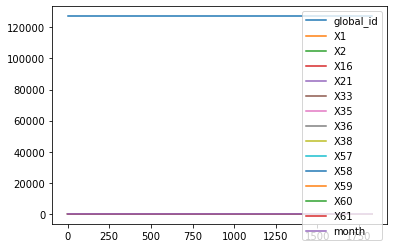

In [57]:
df28.plot()

In [39]:
df128=df28.iloc[:,3:15]

In [40]:
df228=df128.set_index("month")

KeyError: "None of ['month'] are in the columns"

In [41]:
df228.plot()

NameError: name 'df228' is not defined

In [177]:
df228

,X16,X21,X33,X35,X36,X38,X57,X58,X59,X60,X61
month,,,,,,,,,,,
2,2,2,2,0,3,2,0,1,1,0,0
3,2,3,3,0,2,2,0,1,1,0,0
4,2,3,3,0,2,2,0,0,1,0,1
5,2,3,3,0,3,3,0,1,1,0,0
6,2,2,2,0,2,1,0,1,0,0,1
7,1,3,3,0,3,3,0,1,1,0,0
8,1,2,2,0,2,2,0,1,1,0,0
9,1,3,3,0,2,2,0,1,1,0,0
10,1,2,2,0,2,2,0,0,1,0,0


In [178]:
df28

,global_id,X1,X2,X16,X21,X33,X35,X36,X38,X57,X58,X59,X60,X61,month
0,127117,36,3,2,2,2,0,3,2,0,1,1,0,0,2
213,127117,36,3,2,3,3,0,2,2,0,1,1,0,0,3
408,127117,36,3,2,3,3,0,2,2,0,0,1,0,1,4
546,127117,36,3,2,3,3,0,3,3,0,1,1,0,0,5
729,127117,36,3,2,2,2,0,2,1,0,1,0,0,1,6
904,127117,36,3,1,3,3,0,3,3,0,1,1,0,0,7
1143,127117,36,3,1,2,2,0,2,2,0,1,1,0,0,8
1278,127117,36,3,1,3,3,0,2,2,0,1,1,0,0,9
1481,127117,36,3,1,2,2,0,2,2,0,0,1,0,0,10
1643,127117,36,3,1,2,2,0,2,1,0,0,0,0,1,11
